<a href="https://colab.research.google.com/github/Shree-Gowri/Research-paper-Recommendation-System-using-Topic-Modelling/blob/main/research_paper_recommendation_system_using_topic_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Importing libraries and dataset**

In [ ]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
from nltk.corpus import stopwords
import warnings

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def text_processing(df,col):
    temp_df = df[col]
    # 1.Remove punctuation
    temp_df = temp_df.apply(lambda x: re.sub('[[^a-zA-Z]]',' ',x))
    # 2. converting lower case
    temp_df = temp_df.apply(lambda x: x.lower())
    # 3. removing special character and digit
    temp_df = temp_df.apply(lambda x: re.sub("(\\d|\\W)+"," ",x))
    # 4. removing the single letter word
    temp_df = temp_df.apply(lambda x: re.sub(r"\b[a-zA-Z]\b", "",x))
    return temp_df

In [ ]:
def tokenize_lemmatize(df,col):
    temp_df =df[col]
    #1. Word Tokenization:
    temp_df = temp_df.apply(lambda x : word_tokenize(x))
    word_no_pre = temp_df.apply(lambda x: len(x))
    temp_df = temp_df.apply(lambda x : [i for i in x if not i in stopwords.words('english')])
    #2. Word Lemmatization:
    lemmatize =WordNetLemmatizer()
    temp_df = temp_df.apply(lambda x: [lemmatize.lemmatize(i) for i in x])
    word_no_post =temp_df.apply(lambda x: len(x))
    temp_df = temp_df.apply(lambda x: " ".join(x))
    return temp_df,word_no_pre,word_no_post

In [ ]:
def name_extraction(data,author):
    name =[]
    for data_id in data['id']:
        try:
            name.append(list(author[(author['id']==data_id)]['name'])[0])
        except:
            name.append(str('Author Missing'))
            continue
    return name

In [ ]:
data_df=pd.read_csv("/content/drive/MyDrive/papers.csv")

In [ ]:
data_df.drop(['pdf_name','event_type'],axis=1,inplace=True)

In [ ]:
author_df = pd.read_csv('/content/drive/MyDrive/authors.csv')

In [ ]:
data_df['title'] = data_df['title'].map(lambda x: x.lower())

In [ ]:
data_df=pd.read_csv("/content/drive/MyDrive/papers.csv")

In [ ]:
data_df.head()

,id,year,title,abstract,paper_text
0,1,1987,self-organization of associative database and ...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,a mean field theory of layer iv of visual cort...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,storing covariance by the associative long-ter...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,bayesian query construction for neural network...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"neural network ensembles, cross validation, an...",Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


In [ ]:
author_df.head()

,id,name
0,1,Hisashi Suzuki
1,10,David Brady
2,100,Santosh S. Venkatesh
3,1000,Charles Fefferman
4,10000,Artur Speiser



**2. Processing the text**

In [ ]:
data_df['paper_text'] = text_processing(data_df,'paper_text')

<ipython-input-3-0353b5150dd5>:4: FutureWarning: Possible nested set at position 1
  temp_df = temp_df.apply(lambda x: re.sub('[[^a-zA-Z]]',' ',x))


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
data_df['text'],data_df['word_count_pre'],data_df['word_count_post']=tokenize_lemmatize(data_df,'paper_text')

In [ ]:
data_df.head()

,id,year,title,abstract,paper_text,text,word_count_pre,word_count_post
0,1,1987,self-organization of associative database and ...,Abstract Missing,self organization of associative database and...,self organization associative database applica...,3068,1830
1,10,1987,a mean field theory of layer iv of visual cort...,Abstract Missing,mean field theory of layer iv of visual cort...,mean field theory layer iv visual cortex appli...,2268,1320
2,100,1988,storing covariance by the associative long-ter...,Abstract Missing,storing covariance by the associative long te...,storing covariance associative long term poten...,2703,1834
3,1000,1994,bayesian query construction for neural network...,Abstract Missing,bayesian query construction for neural network...,bayesian query construction neural network mod...,2560,1672
4,1001,1994,"neural network ensembles, cross validation, an...",Abstract Missing,neural network ensembles cross validation and ...,neural network ensemble cross validation activ...,2983,1663


**3. Saving the processed data**

In [ ]:
author_name = name_extraction(data_df,author_df)

In [ ]:
data_df['author_name'] = pd.DataFrame(author_name)

In [ ]:
data_df.drop(['paper_text','abstract'],axis=1,inplace=True)

In [ ]:
data_df.head(10)

,id,year,title,text,word_count_pre,word_count_post,author_name
0,1,1987,self-organization of associative database and ...,self organization associative database applica...,3068,1830,Hisashi Suzuki
1,10,1987,a mean field theory of layer iv of visual cort...,mean field theory layer iv visual cortex appli...,2268,1320,David Brady
2,100,1988,storing covariance by the associative long-ter...,storing covariance associative long term poten...,2703,1834,Santosh S. Venkatesh
3,1000,1994,bayesian query construction for neural network...,bayesian query construction neural network mod...,2560,1672,Charles Fefferman
4,1001,1994,"neural network ensembles, cross validation, an...",neural network ensemble cross validation activ...,2983,1663,Scott Markel
5,1002,1994,using a neural net to instantiate a deformable...,sing neural net instantiate deformable model c...,3304,1979,Gregory J. Wolff
6,1003,1994,plasticity-mediated competitive learning,plasticity mediated competitive learning terre...,1558,1014,Timothy W. Cacciatore
7,1004,1994,iceg morphology classification using an analog...,iceg morphology classification using analogue ...,2531,1635,Paul Sajda
8,1005,1994,real-time control of a tokamak plasma using ne...,real time control tokamak plasma using neural ...,2472,1560,Leif H. Finkel
9,1006,1994,pulsestream synapses with non-volatile analogu...,real time control tokamak plasma using neural ...,4334,2799,Arun K. Jagota



**4.Detecting missing values**

In [ ]:
data_df.fillna(np.nan,inplace=True)

In [ ]:
data_df.isnull().sum()

id                 0
year               0
title              0
text               0
word_count_pre     0
word_count_post    0
author_name        0
dtype: int64

In [ ]:
data_df.to_csv('process_data.csv',index=False)

**5.Importing libraries and datasets**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

import os
import tensorflow as tf
from sklearn.manifold import TSNE
from tensorboard.plugins import projector
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
warnings.filterwarnings('ignore')

In [ ]:
def wordcloud_cluster(data_frame,columns):
    temp_df = list(data_frame[columns])
    cloud = " ".join(temp_df)
    stop_words = set(stopwords.words("english"))
    wordcloud = WordCloud(width = 1600, height = 1200,
                background_color ='black',
                stopwords = stop_words,
                min_font_size = 10).generate(cloud)
    # plot the WordCloud image
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.show()
    return plt


In [ ]:
def visualizing_topic_cluster(model,stop_len,feat_name):
    topic={}
    for index,topix in enumerate(model.components_):
        topic[index]= [feat_name[i] for i in topix.argsort()[:-stop_len-1:-1]]

    return topic

In [ ]:
def visualizing_topic_cluster(model,stop_len,feat_name):
    topic={}
    for index,topix in enumerate(model.components_):
        topic[index]= [feat_name[i] for i in topix.argsort()[:-stop_len-1:-1]]

    return topic

In [ ]:
def rmse_calculation(x,y):
    x,y =x,y
    error=[]
    len_y =len(y)
    for i in range(len_y):
        error.append(np.sqrt(np.power((np.array(x)-np.array(y[i])),2).sum()/len_y))
    return error

In [ ]:
def reccomendation(df,paper_id,col):
    paper_1 = df[(df['id']==paper_id)]
    dominant_topic = int(paper_1['Major_topic'])
    keyword =paper_1['keyword']
    paper_2 =df
    paper_2 = paper_2.drop(paper_1.index)
    x= paper_1[columns].values.tolist()
    y= paper_2[columns].values.tolist()
    error = np.round(rmse_calculation(x,y),6)
    paper_2['error'] = error
    paper_2 = paper_2[['id','title','error','Major_topic']].sort_values('error').head(10)
    title = list(paper_2['title'])
    error = list(paper_2['error'])
    topic_actual =list(paper_2['Major_topic'])
    topic_pred  = list([int(dominant_topic) for i in range(len(title))])
    print(" The title  of selected paper is  :  {}".format(list(paper_1.title)[0]))
    print(" Major Topic --- {}".format(dominant_topic))
    print("------------------------------------------------------------------------------------------------------------------------")
    print(" The  keywords which is highlighted in this topic are as follows : ")
    [print(i,) for i in paper_1['keyword']]
    print("------------------------------------------------------------------------------------------------------------------------")
    print(" The Recommended topic are as follows: ")
    [print(i+1,"...",title[i],"---","\n","     Error  is ","...",error[i]) for i in range(10)]
    print("------------------------------------------------------------------------------------------------------------------------")

In [ ]:
def eval_metrics(df,col):
    topic_actual=[]
    topic_pred =[]
    for i in range(len(df)):
        paper_1 = df.iloc[i]
        dominant_topic = int(paper_1['Major_topic'])
        related_topic_no = len(df[(df['Major_topic']==dominant_topic)])-1
        paper_2 = df[(df['id']!=paper_1['id'])]
        x= paper_1[col].values.tolist()
        y= paper_2[col].values.tolist()
        error = np.round(rmse_calculation(x,y),6)
        paper_2['error'] = error
        paper_2 = paper_2[['id','title','error','Major_topic']].sort_values('error').head(related_topic_no)
        topic_actual = topic_actual+paper_2['Major_topic'].values.tolist()
        topic_pred = topic_pred +list([int(dominant_topic) for i in range(len(paper_2))])
    return topic_actual,topic_pred

In [ ]:
def confusion_matrix_plot(actual,pred,col):
    plt.figure(figsize=(10,10))
    sns.heatmap(confusion_matrix(actual,pred),annot=True,fmt='0.0f',xticklabels=col,yticklabels=col,cmap='coolwarm')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    print(" The accuracy score is : {}".format(accuracy_score(actual,pred)))
    print("...........................................................................................................................")
    print(" The classification report ")
    print(classification_report(actual,pred))

In [ ]:
data_df = pd.read_csv('process_data.csv')

In [ ]:
data_df.head()

,id,year,title,text,word_count_pre,word_count_post,author_name
0,1,1987,self-organization of associative database and ...,self organization associative database applica...,3068,1830,Hisashi Suzuki
1,10,1987,a mean field theory of layer iv of visual cort...,mean field theory layer iv visual cortex appli...,2268,1320,David Brady
2,100,1988,storing covariance by the associative long-ter...,storing covariance associative long term poten...,2703,1834,Santosh S. Venkatesh
3,1000,1994,bayesian query construction for neural network...,bayesian query construction neural network mod...,2560,1672,Charles Fefferman
4,1001,1994,"neural network ensembles, cross validation, an...",neural network ensemble cross validation activ...,2983,1663,Scott Markel



**6.Removing missing values**

In [ ]:
data_df.shape

(7241, 7)

In [ ]:
data_df.isnull().sum()

id                 0
year               0
title              0
text               3
word_count_pre     0
word_count_post    0
author_name        0
dtype: int64

In [ ]:
data_df.dropna(inplace=True,axis=0)

In [ ]:
data_df.shape

(7238, 7)

**7.Exploratory Data analysis of the dataset**

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30],
 [Text(0, 0, '1987'),
  Text(1, 0, '1988'),
  Text(2, 0, '1989'),
  Text(3, 0, '1990'),
  Text(4, 0, '1991'),
  Text(5, 0, '1992'),
  Text(6, 0, '1993'),
  Text(7, 0, '1994'),
  Text(8, 0, '1995'),
  Text(9, 0, '1996'),
  Text(10, 0, '1997'),
  Text(11, 0, '1998'),
  Text(12, 0, '1999'),
  Text(13, 0, '2000'),
  Text(14, 0, '2001'),
  Text(15, 0, '2002'),
  Text(16, 0, '2003'),
  Text(17, 0, '2004'),
  Text(18, 0, '2005'),
  Text(19, 0, '2006'),
  Text(20, 0, '2007'),
  Text(21, 0, '2008'),
  Text(22, 0, '2009'),
  Text(23, 0, '2010'),
  Text(24, 0, '2011'),
  Text(25, 0, '2012'),
  Text(26, 0, '2013'),
  Text(27, 0, '2014'),
  Text(28, 0, '2015'),
  Text(29, 0, '2016'),
  Text(30, 0, '2017')])

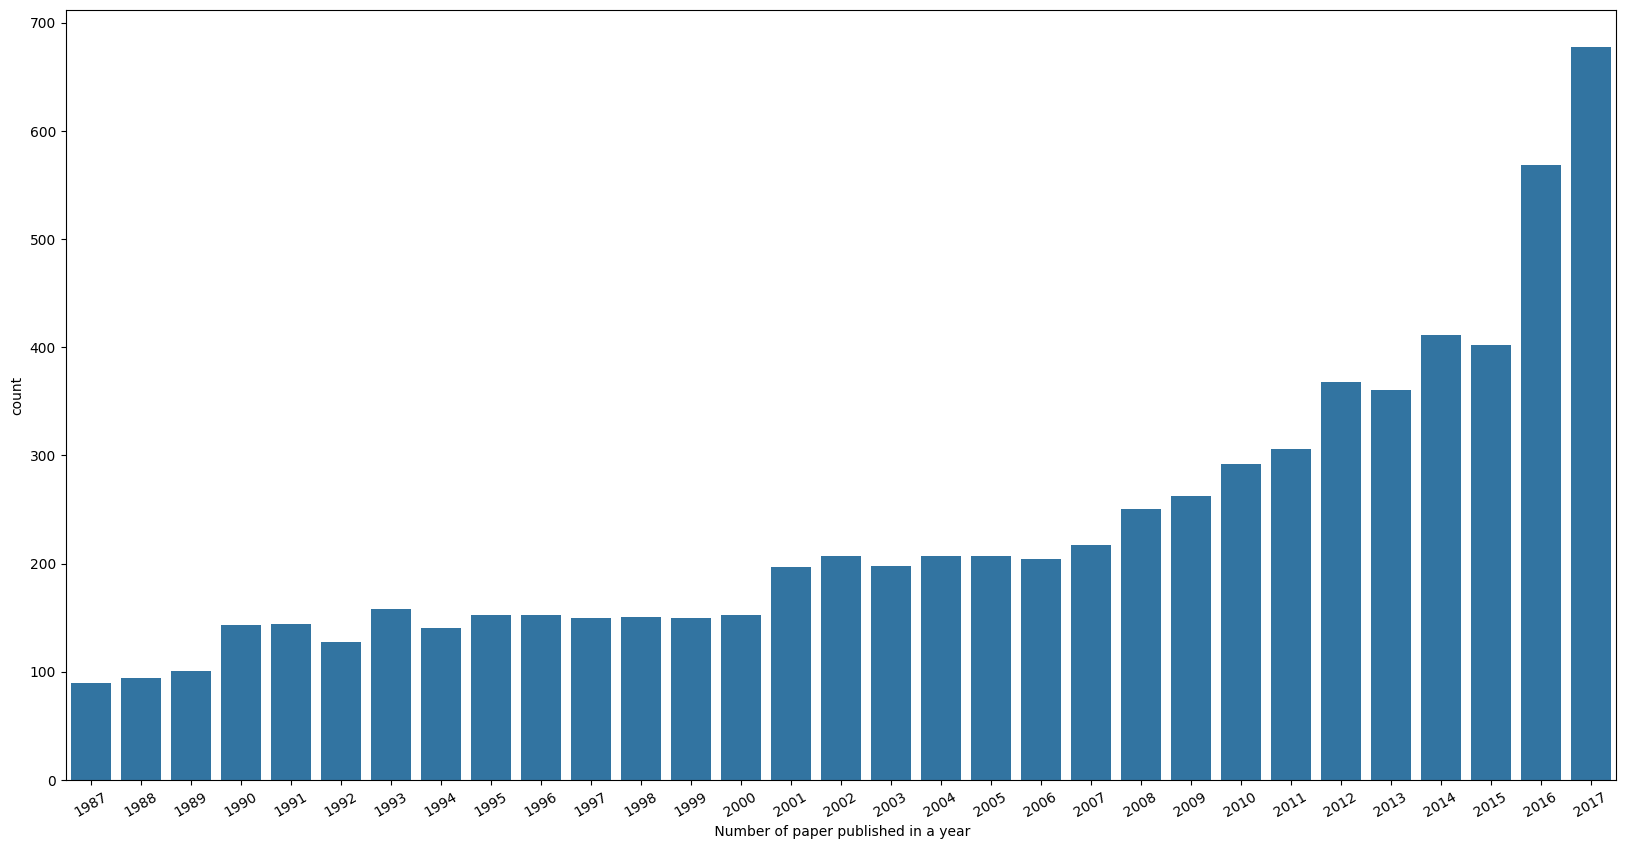

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x='year',data=data_df)
plt.xlabel(" Number of paper published in a year")
plt.xticks(rotation = 30)

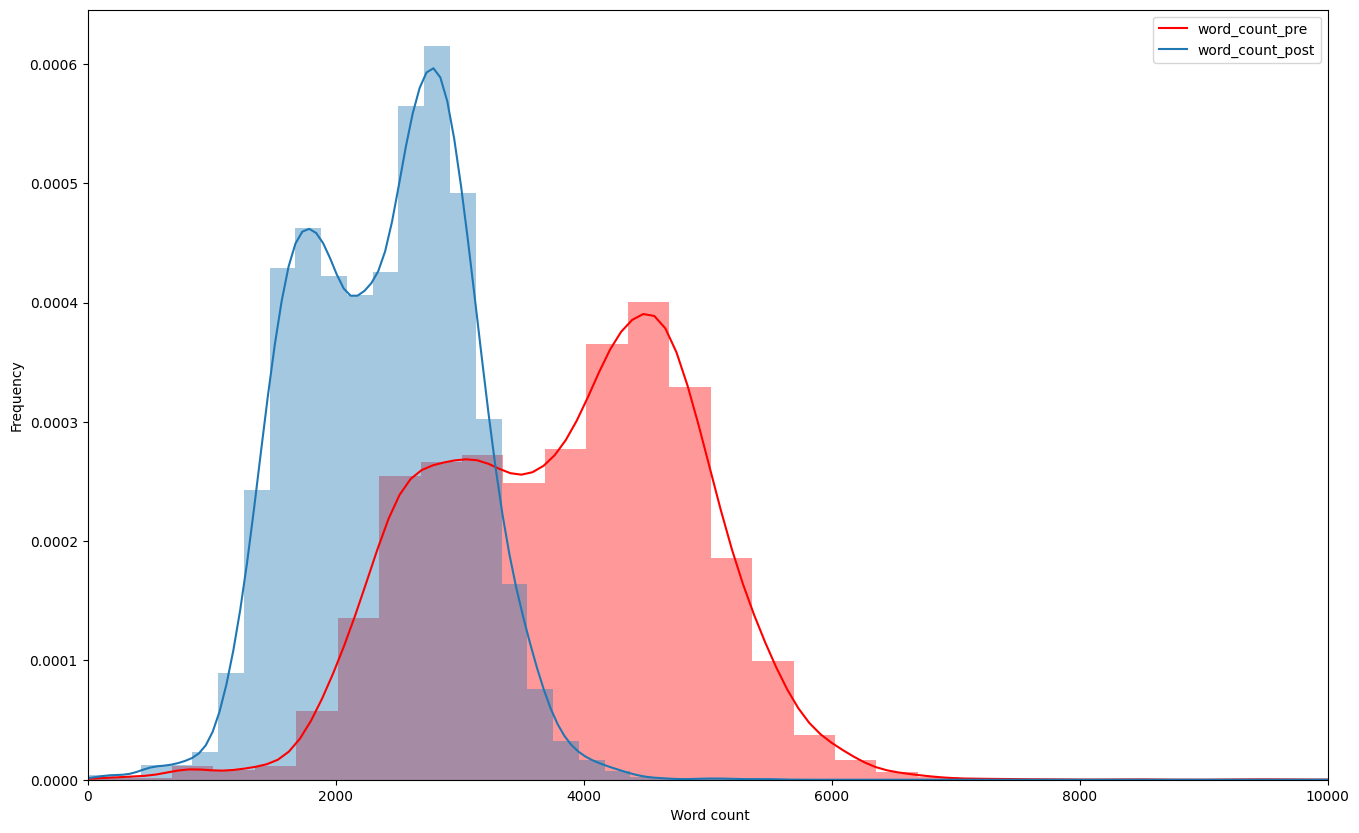

In [ ]:
plt.figure(figsize=(16,10))
sns.distplot(data_df['word_count_pre'],color='red')
sns.distplot(data_df['word_count_post'])
plt.xlabel(" Word count")
plt.ylabel('Frequency')
plt.xlim([0,10000])
plt.legend(['word_count_pre','word_count_post'],loc='best')

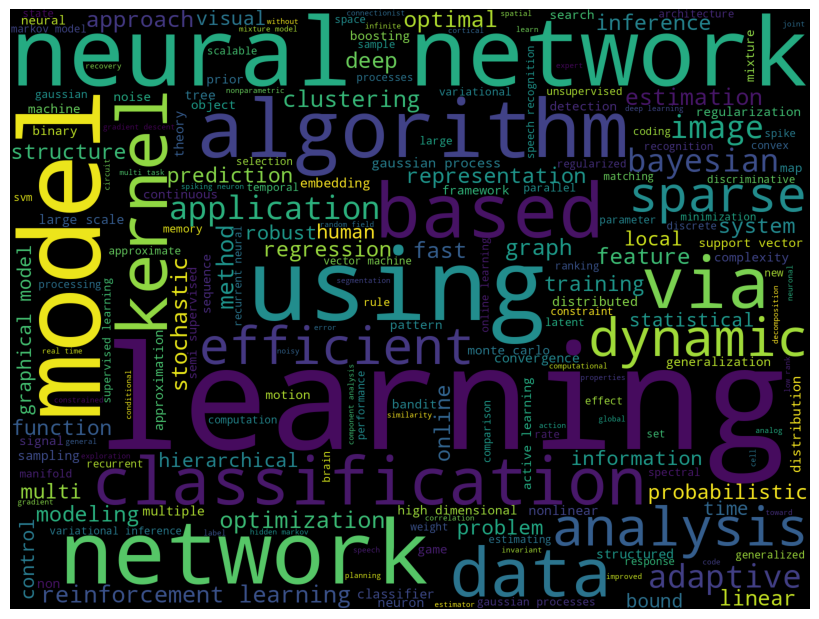

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

In [ ]:
wordcloud_cluster(data_df,'title')

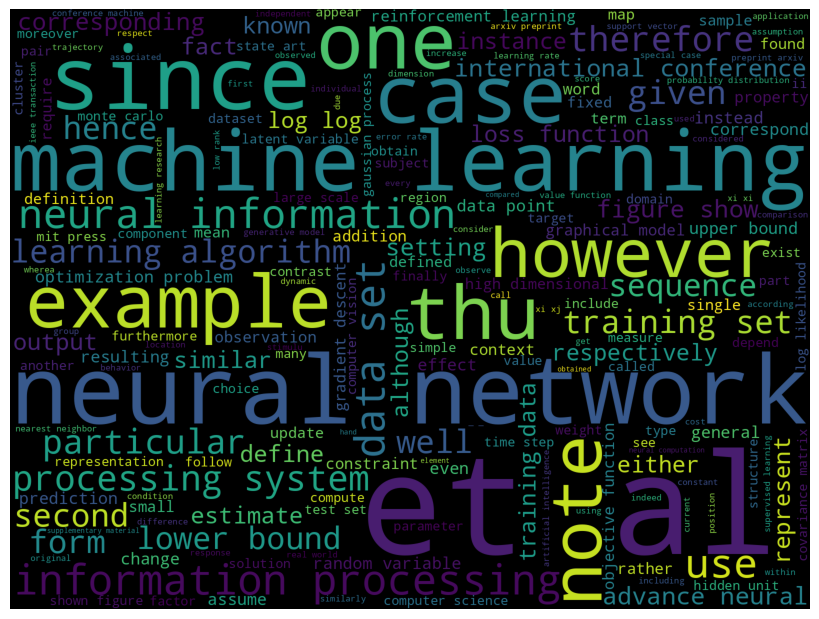

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

In [ ]:
wordcloud_cluster(data_df,'text')

In [ ]:
data_df.head()

,id,year,title,text,word_count_pre,word_count_post,author_name
0,1,1987,self-organization of associative database and ...,self organization associative database applica...,3068,1830,Hisashi Suzuki
1,10,1987,a mean field theory of layer iv of visual cort...,mean field theory layer iv visual cortex appli...,2268,1320,David Brady
2,100,1988,storing covariance by the associative long-ter...,storing covariance associative long term poten...,2703,1834,Santosh S. Venkatesh
3,1000,1994,bayesian query construction for neural network...,bayesian query construction neural network mod...,2560,1672,Charles Fefferman
4,1001,1994,"neural network ensembles, cross validation, an...",neural network ensemble cross validation activ...,2983,1663,Scott Markel


**8.Creating Word vector and intializing models**

In [ ]:
!pip install scikit-learn

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

NO_FEAT = 5000
NO_TOPIC = 10

# CountVectorizer converts a collection of text documents to a matrix of token counts
# It does not provide direct access to feature names like TfidfVectorizer
# However, you can still get the feature names indirectly
tf_vectorizer = CountVectorizer(max_features=NO_FEAT, stop_words='english', min_df=10)
X_tf = tf_vectorizer.fit_transform(data_df['text'])
tf_feat_name = tf_vectorizer.get_feature_names_out()


In [ ]:
lda_model = LatentDirichletAllocation(learning_method='online',random_state=23,n_components=NO_TOPIC)
lda_output =lda_model.fit_transform(X_tf)

In [ ]:
topic_lda =visualizing_topic_cluster(lda_model,10,tf_feat_name)

In [ ]:
len([print('Topic'+str(key),topic_lda[key]) for key in topic_lda])

Topic0 ['learning', 'data', 'feature', 'set', 'training', 'kernel', 'label', 'method', 'classification', 'class']
Topic1 ['algorithm', 'function', 'bound', 'problem', 'theorem', 'log', 'set', 'let', 'result', 'case']
Topic2 ['state', 'policy', 'learning', 'action', 'algorithm', 'reward', 'value', 'function', 'time', 'agent']
Topic3 ['model', 'distribution', 'data', 'variable', 'parameter', 'inference', 'log', 'graph', 'likelihood', 'process']
Topic4 ['time', 'word', 'sequence', 'model', 'state', 'node', 'data', 'memory', 'speech', 'using']
Topic5 ['matrix', 'method', 'data', 'algorithm', 'sparse', 'vector', 'linear', 'problem', 'rank', 'kernel']
Topic6 ['neuron', 'cell', 'time', 'spike', 'input', 'neural', 'model', 'response', 'stimulus', 'network']
Topic7 ['network', 'neural', 'learning', 'layer', 'training', 'input', 'unit', 'weight', 'output', 'deep']
Topic8 ['model', 'task', 'human', 'data', 'figure', 'subject', 'target', 'experiment', 'feature', 'representation']
Topic9 ['image', 

10

In [ ]:
columns=['Topic'+ i for i in list(map(str,list(topic_lda.keys())))]

In [ ]:
lda_df =pd.DataFrame(lda_output,columns=columns).apply(lambda x : np.round(x,3))

In [ ]:
lda_df['Major_topic'] =lda_df[columns].idxmax(axis=1).apply(lambda x: int(x[-1]))

In [ ]:
lda_df['keyword'] = lda_df['Major_topic'].apply(lambda x: topic_lda[x])

In [ ]:
lda_df.head(20)

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,Major_topic,keyword
0,0.038,0.194,0.087,0.000,0.243,0.002,0.029,0.112,0.127,0.168,4,"[time, word, sequence, model, state, node, dat..."
1,0.000,0.025,0.003,0.011,0.000,0.022,0.848,0.092,0.000,0.000,6,"[neuron, cell, time, spike, input, neural, mod..."
2,0.000,0.000,0.000,0.000,0.005,0.025,0.962,0.008,0.000,0.000,6,"[neuron, cell, time, spike, input, neural, mod..."
3,0.169,0.079,0.108,0.337,0.000,0.005,0.000,0.257,0.046,0.000,3,"[model, distribution, data, variable, paramete..."
4,0.271,0.043,0.000,0.000,0.000,0.026,0.014,0.584,0.062,0.000,7,"[network, neural, learning, layer, training, i..."
5,0.017,0.000,0.000,0.125,0.000,0.013,0.000,0.511,0.147,0.185,7,"[network, neural, learning, layer, training, i..."
6,0.153,0.018,0.000,0.063,0.016,0.038,0.303,0.404,0.000,0.004,7,"[network, neural, learning, layer, training, i..."
7,0.077,0.000,0.000,0.000,0.488,0.000,0.174,0.229,0.033,0.000,4,"[time, word, sequence, model, state, node, dat..."
8,0.000,0.000,0.000,0.000,0.260,0.086,0.195,0.350,0.060,0.048,7,"[network, neural, learning, layer, training, i..."
9,0.000,0.000,0.000,0.000,0.419,0.038,0.320,0.217,0.000,0.005,4,"[time, word, sequence, model, state, node, dat..."


Text(0.5, 1.0, ' Correlation Plot')

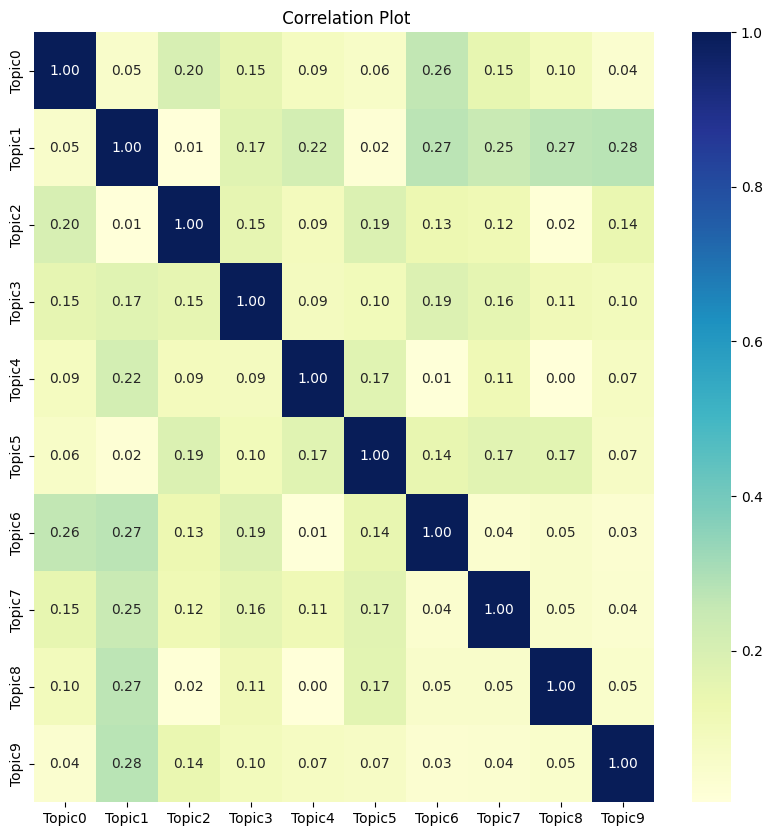

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(abs(lda_df[columns].corr()),annot=True,fmt ='0.2f',cmap="YlGnBu")
plt.title(" Correlation Plot")

In [ ]:
data_df.reset_index(inplace=True)

In [ ]:
data_df.shape,lda_df.shape

((7238, 8), (7238, 12))

In [ ]:
df_total =pd.concat(objs=(lda_df,data_df[['id','title']]),axis=1)

In [ ]:
df_total.shape

(7238, 14)

**9. t-SNE 2D Visualization**

In [ ]:
!pip install scikit-learn
import numpy as np
from sklearn.manifold import TSNE

In [ ]:
tsne_model = TSNE(n_components=2,random_state=23)

In [ ]:
X = X_tf.toarray()

In [ ]:
vect_2D = tsne_model.fit_transform(X)

In [ ]:
x_cor_2d=[]
y_cor_2d=[]
for x,y in vect_2D:
    x_cor_2d.append(x)
    y_cor_2d.append(y)

In [ ]:
topic_no =list(lda_df['Major_topic'])

(-61.873995780944824, 65.06574153900146, -61.69820137023926, 65.02010841369629)

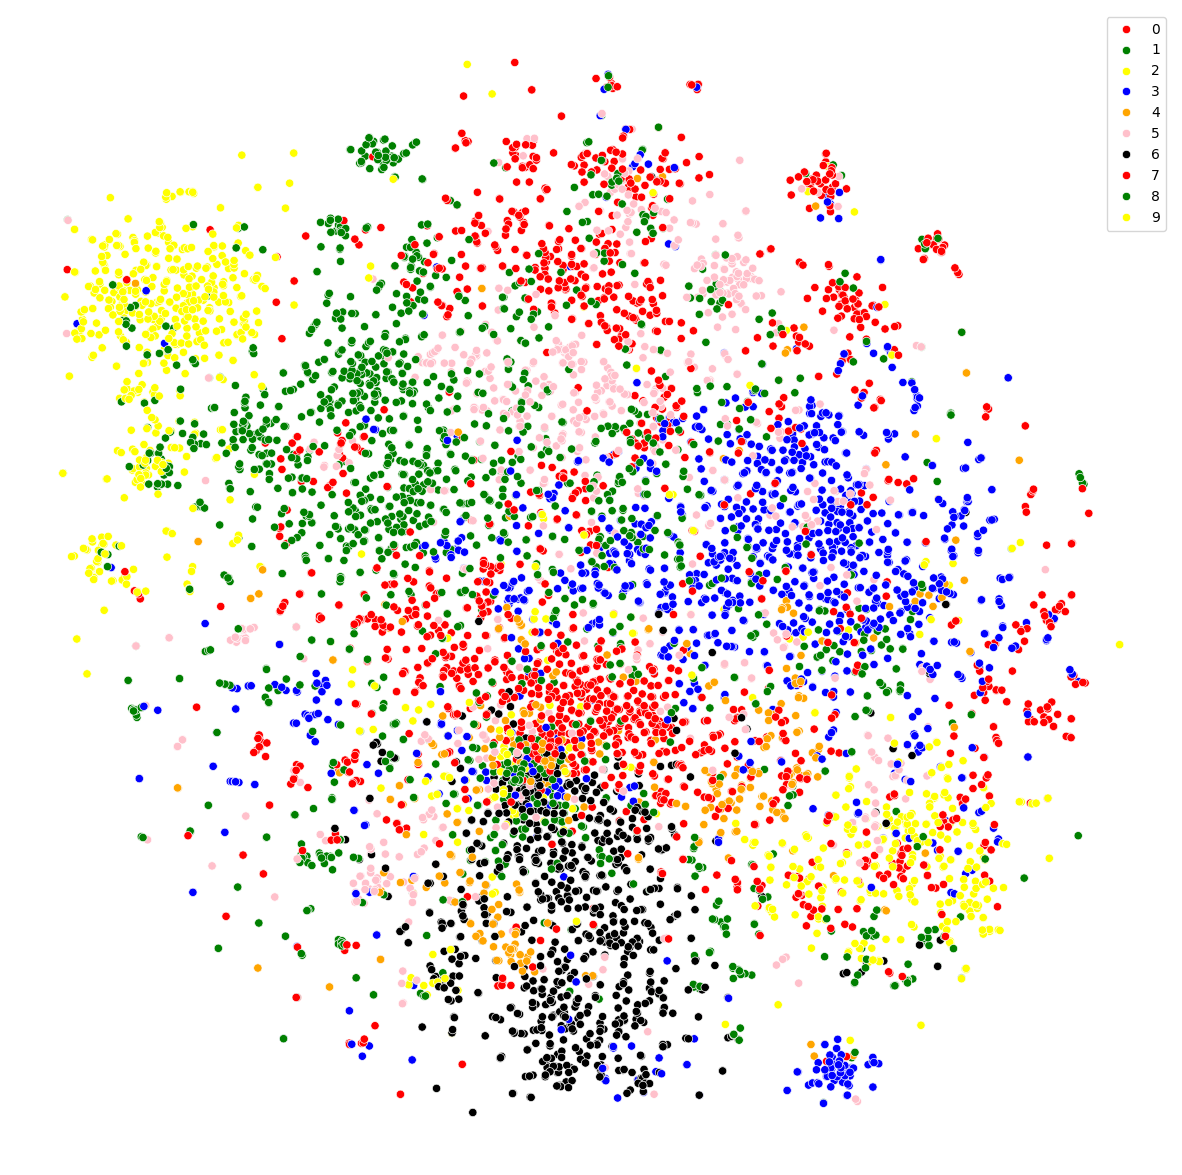

In [ ]:
plt.figure(figsize=(15,15))
sns.scatterplot(x=x_cor_2d,y=y_cor_2d,hue=topic_no,palette=['red','green','yellow','blue','orange','pink','black'])
plt.axis('off')


**10.Reccomendation System**

In [ ]:
reccomendation(df_total,1434,columns)

 The title  of selected paper is  :  hybrid reinforcement learning and its application to biped robot control
 Major Topic --- 2
------------------------------------------------------------------------------------------------------------------------
 The  keywords which is highlighted in this topic are as follows : 
['state', 'policy', 'learning', 'action', 'algorithm', 'reward', 'value', 'function', 'time', 'agent']
------------------------------------------------------------------------------------------------------------------------
 The Recommended topic are as follows: 
1 ... efficient nonlinear control with actor-tutor architecture --- 
      Error  is  ... 0.000667
2 ... active exploration in dynamic environments --- 
      Error  is  ... 0.001213
3 ... planning with an adaptive world model --- 
      Error  is  ... 0.00133
4 ... imagination-augmented agents for deep reinforcement learning --- 
      Error  is  ... 0.001424
5 ... the efficient learning of multiple task sequences

In [ ]:
reccomendation(df_total,1007,columns)

 The title  of selected paper is  :  learning to play the game of chess
 Major Topic --- 2
------------------------------------------------------------------------------------------------------------------------
 The  keywords which is highlighted in this topic are as follows : 
['state', 'policy', 'learning', 'action', 'algorithm', 'reward', 'value', 'function', 'time', 'agent']
------------------------------------------------------------------------------------------------------------------------
 The Recommended topic are as follows: 
1 ... why did td-gammon work? --- 
      Error  is  ... 0.001233
2 ... planning with an adaptive world model --- 
      Error  is  ... 0.001373
3 ... learning to control an unstable system with forward modeling --- 
      Error  is  ... 0.001423
4 ... towards generalization and simplicity in continuous control --- 
      Error  is  ... 0.001476
5 ... imagination-augmented agents for deep reinforcement learning --- 
      Error  is  ... 0.001504
6 ... t

In [ ]:
reccomendation(df_total,174,columns)

 The title  of selected paper is  :  speech recognition: statistical and neural information processing approaches
 Major Topic --- 4
------------------------------------------------------------------------------------------------------------------------
 The  keywords which is highlighted in this topic are as follows : 
['time', 'word', 'sequence', 'model', 'state', 'node', 'data', 'memory', 'speech', 'using']
------------------------------------------------------------------------------------------------------------------------
 The Recommended topic are as follows: 
1 ... incremental parsing by modular recurrent connectionist networks --- 
      Error  is  ... 0.000668
2 ... harmonet: a neural net for harmonizing chorales in the style of j. s. bach --- 
      Error  is  ... 0.000819
3 ... grammar learning by a self-organizing network --- 
      Error  is  ... 0.001089
4 ... a connectionist symbol manipulator that discovers the structure of context-free languages --- 
      Error  is 

In [ ]:
reccomendation(df_total,100,columns)

 The title  of selected paper is  :  storing covariance by the associative long-term potentiation and depression of synaptic strengths in the hippocampus
 Major Topic --- 6
------------------------------------------------------------------------------------------------------------------------
 The  keywords which is highlighted in this topic are as follows : 
['neuron', 'cell', 'time', 'spike', 'input', 'neural', 'model', 'response', 'stimulus', 'network']
------------------------------------------------------------------------------------------------------------------------
 The Recommended topic are as follows: 
1 ... recurrent cortical amplification produces complex cell responses --- 
      Error  is  ... 0.000223
2 ... cholinergic modulation preserves spike timing under physiologically realistic fluctuating input --- 
      Error  is  ... 0.000368
3 ... direction selectivity in primary visual cortex using massive intracortical connections --- 
      Error  is  ... 0.000371
4 ... s

In [ ]:
reccomendation(df_total,1534,columns)

 The title  of selected paper is  :  analog vlsi cellular implementation of the boundary contour system
 Major Topic --- 6
------------------------------------------------------------------------------------------------------------------------
 The  keywords which is highlighted in this topic are as follows : 
['neuron', 'cell', 'time', 'spike', 'input', 'neural', 'model', 'response', 'stimulus', 'network']
------------------------------------------------------------------------------------------------------------------------
 The Recommended topic are as follows: 
1 ... parallel analog vlsi architectures for computation of heading direction and time-to-contact --- 
      Error  is  ... 0.001124
2 ... vlsi implementation of cortical visual motion detection using an analog neural computer --- 
      Error  is  ... 0.001417
3 ... vlsi model of primate visual smooth pursuit --- 
      Error  is  ... 0.001546
4 ... an analog vlsi neural network for phase-based machine vision --- 
      Err

In [ ]:
reccomendation(df_total,1005,columns)

 The title  of selected paper is  :  real-time control of a tokamak plasma using neural networks
 Major Topic --- 7
------------------------------------------------------------------------------------------------------------------------
 The  keywords which is highlighted in this topic are as follows : 
['network', 'neural', 'learning', 'layer', 'training', 'input', 'unit', 'weight', 'output', 'deep']
------------------------------------------------------------------------------------------------------------------------
 The Recommended topic are as follows: 
1 ... an analog vlsi chip for radial basis functions --- 
      Error  is  ... 0.0012
2 ... neural network modeling of speech and music signals --- 
      Error  is  ... 0.001207
3 ... lg depth estimation and ripple fire characterization using artificial neural networks --- 
      Error  is  ... 0.00129
4 ... a neural network for real-time signal processing --- 
      Error  is  ... 0.001659
5 ... using a translation-invariant neu

In [ ]:
reccomendation(df_total,1085,columns)

 The title  of selected paper is  :  high-performance job-shop scheduling with a time-delay td(?) network
 Major Topic --- 1
------------------------------------------------------------------------------------------------------------------------
 The  keywords which is highlighted in this topic are as follows : 
['algorithm', 'function', 'bound', 'problem', 'theorem', 'log', 'set', 'let', 'result', 'case']
------------------------------------------------------------------------------------------------------------------------
 The Recommended topic are as follows: 
1 ... adaptive accelerated gradient converging method under h\"{o}lderian error bound condition --- 
      Error  is  ... 0.000118
2 ... linear convergence with condition number independent access of full gradients --- 
      Error  is  ... 0.000142
3 ... fast rates for exp-concave empirical risk minimization --- 
      Error  is  ... 0.000154
4 ... pruning with generalization based weight saliencies: ?obd, ?obs --- 
      Er

In [ ]:
reccomendation(df_total,108,columns)

 The title  of selected paper is  :  neural networks for model matching and perceptual organization
 Major Topic --- 9
------------------------------------------------------------------------------------------------------------------------
 The  keywords which is highlighted in this topic are as follows : 
['image', 'object', 'feature', 'model', 'pixel', 'recognition', 'visual', 'using', 'figure', 'map']
------------------------------------------------------------------------------------------------------------------------
 The Recommended topic are as follows: 
1 ... graph-based visual saliency --- 
      Error  is  ... 0.00214
2 ... bayesian video shot segmentation --- 
      Error  is  ... 0.002148
3 ... shape and material from sound --- 
      Error  is  ... 0.002275
4 ... learning saccadic eye movements using multiscale spatial filters --- 
      Error  is  ... 0.002432
5 ... variational laws of visual attention for dynamic scenes --- 
      Error  is  ... 0.002516
6 ... a neural 

In [ ]:
reccomendation(df_total,1325,columns)

 The title  of selected paper is  :  combinations of weak classifiers
 Major Topic --- 0
------------------------------------------------------------------------------------------------------------------------
 The  keywords which is highlighted in this topic are as follows : 
['learning', 'data', 'feature', 'set', 'training', 'kernel', 'label', 'method', 'classification', 'class']
------------------------------------------------------------------------------------------------------------------------
 The Recommended topic are as follows: 
1 ... improved output coding for classification using continuous relaxation --- 
      Error  is  ... 0.001182
2 ... hamming distance metric learning --- 
      Error  is  ... 0.001314
3 ... improved deep metric learning with multi-class n-pair loss objective --- 
      Error  is  ... 0.001323
4 ... maximizing subset accuracy with recurrent neural networks in multi-label classification --- 
      Error  is  ... 0.001342
5 ... few-shot learning throug

In [ ]:
reccomendation(df_total,1378,columns)

 The title  of selected paper is  :  using expectation to guide processing: a study of three real-world applications
 Major Topic --- 7
------------------------------------------------------------------------------------------------------------------------
 The  keywords which is highlighted in this topic are as follows : 
['network', 'neural', 'learning', 'layer', 'training', 'input', 'unit', 'weight', 'output', 'deep']
------------------------------------------------------------------------------------------------------------------------
 The Recommended topic are as follows: 
1 ... intersecting regions: the key to combinatorial structure in hidden unit space --- 
      Error  is  ... 0.000877
2 ... non-intrusive gaze tracking using artificial neural networks --- 
      Error  is  ... 0.001221
3 ... using a saliency map for active spatial selective attention: implementation & initial results --- 
      Error  is  ... 0.001261
4 ... visual gesture-based robot guidance with a modular n

In [ ]:
reccomendation(df_total,1529,columns)

 The title  of selected paper is  :  stationarity and stability of autoregressive neural network processes
 Major Topic --- 3
------------------------------------------------------------------------------------------------------------------------
 The  keywords which is highlighted in this topic are as follows : 
['model', 'distribution', 'data', 'variable', 'parameter', 'inference', 'log', 'graph', 'likelihood', 'process']
------------------------------------------------------------------------------------------------------------------------
 The Recommended topic are as follows: 
1 ... unsupervised and supervised clustering: the mutual information between parameters and observations --- 
      Error  is  ... 0.001394
2 ... a tighter bound for graphical models --- 
      Error  is  ... 0.001453
3 ... learning path distributions using nonequilibrium diffusion networks --- 
      Error  is  ... 0.001655
4 ... a theory of mean field approximation --- 
      Error  is  ... 0.001711
5 ... 

In [ ]:
reccomendation(df_total,999,columns)

 The title  of selected paper is  :  correlation and interpolation networks for real-time expression analysis/synthesis
 Major Topic --- 8
------------------------------------------------------------------------------------------------------------------------
 The  keywords which is highlighted in this topic are as follows : 
['model', 'task', 'human', 'data', 'figure', 'subject', 'target', 'experiment', 'feature', 'representation']
------------------------------------------------------------------------------------------------------------------------
 The Recommended topic are as follows: 
1 ... hierarchical question-image co-attention for visual question answering --- 
      Error  is  ... 0.000961
2 ... a prototype for automatic recognition of spontaneous facial actions --- 
      Error  is  ... 0.001655
3 ... 3d object recognition using unsupervised feature extraction --- 
      Error  is  ... 0.001752
4 ... qualitative structure from motion --- 
      Error  is  ... 0.001881
5 ...

**Evaluation**

In [ ]:
topic_actual,topic_pred = eval_metrics(df_total,columns)

In [ ]:
confusion_matrix_plot(topic_actual,topic_pred,columns)

**Summary:**
At first,we will import libraires and processed dataset
Removing the missing values
Count plot of the research paper publish per year, we see that as year increases the number of research paper published also increased.
We observed that number of words decreases before and after the word processing.On average the number of word before text processing was nearly 4000 words to 6000 words.After the word processing the word count decreases
Creating the word clould of the title and documents we see that title word cloud consists of more technial terms where as when we take the whole text then we found that many Part Of Speech(POS) are also included in the word cloud.
Creating a word vector using CountVectorizer and trying to find the optimal number of topics using coherence score.
Creating the LDA model as per the cluster visualization and fitting the data into the model.
when we do correlation between the topics we found that most of the topics are not correlated,it means that the words present in a certain cluster has minimal chances to be found in another clusters.
Visualizing word cluster in a t-SNE visualization using tensorboard.
Creating the reccomendation function based on root mean square error and printing the recommended title with the error.
Evaluating the reccomendation system based on Major topic classification.When the topics is fragmented ionto different cluster then there is a slight error because it evaluted the topic only on major topic classification, but overall acuuracy acore is 75%.






